In [32]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [42]:
def resize_template_if_needed(image, template):
    image_h, image_w = image.shape[:2]
    template_h, template_w = template.shape[:2]
    
    if template_h > image_h or template_w > image_w:
        scale = min(image_h / template_h, image_w / template_w)
        template = cv.resize(template, (int(template_w * scale), int(template_h * scale)))
    return template

def apply_nms(detections, scores, iou_threshold=0.5):
    detections = np.array(detections)
    scores = np.array(scores)
    indices = cv.dnn.NMSBoxes(detections.tolist(), scores.tolist(), 0.5, iou_threshold)
    if len(indices) > 0:
        indices = indices.flatten()
        return [detections[i] for i in indices]
    return []

In [43]:
template_path = './TP3/template/pattern.png'
image_paths = [
    './TP3/images/logo_1.png',
    './TP3/images/coca_retro_2.png',
    './TP3/images/coca_retro_1.png',
    './TP3/images/coca_multi.png',
    './TP3/images/coca_logo_2.png',
    './TP3/images/coca_logo_1.png',
    './TP3/images/COCA-COLA-LOGO.jpg'
]

In [44]:
template = cv.imread(template_path, cv.IMREAD_GRAYSCALE)
template = cv.Canny(template, 50, 150)
template_h, template_w = template.shape[:2]

./TP3/images/logo_1.png


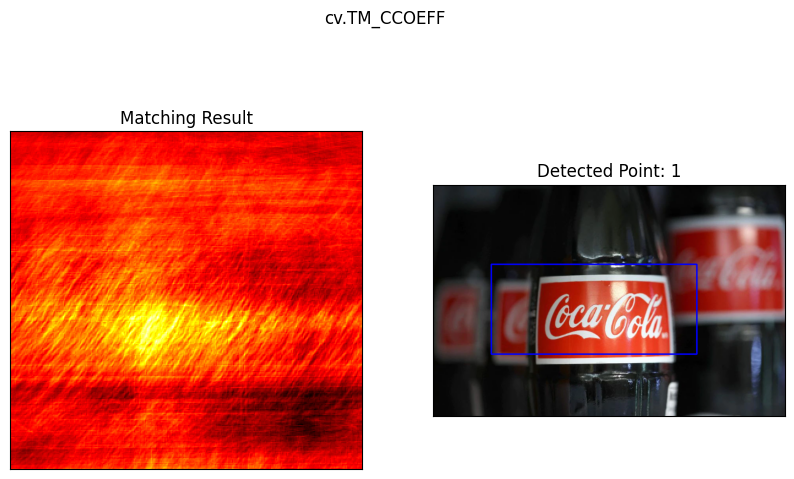

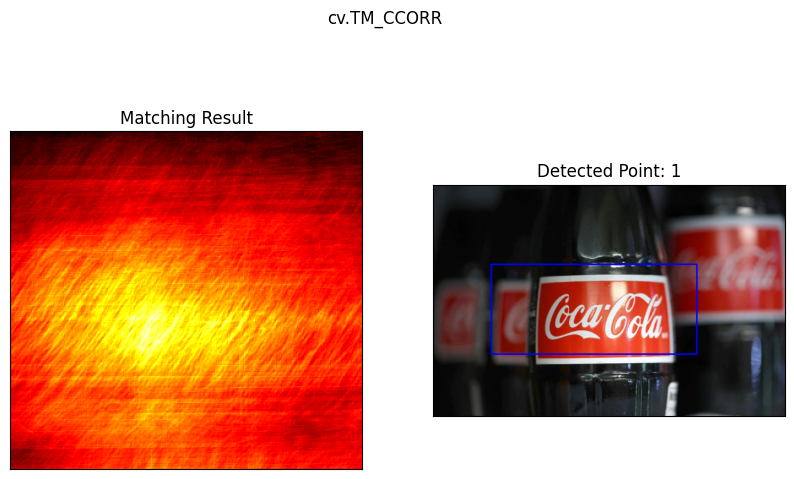

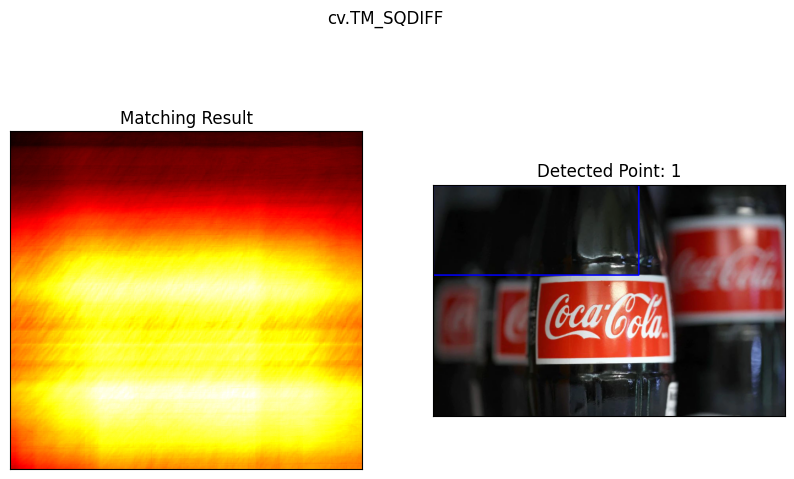

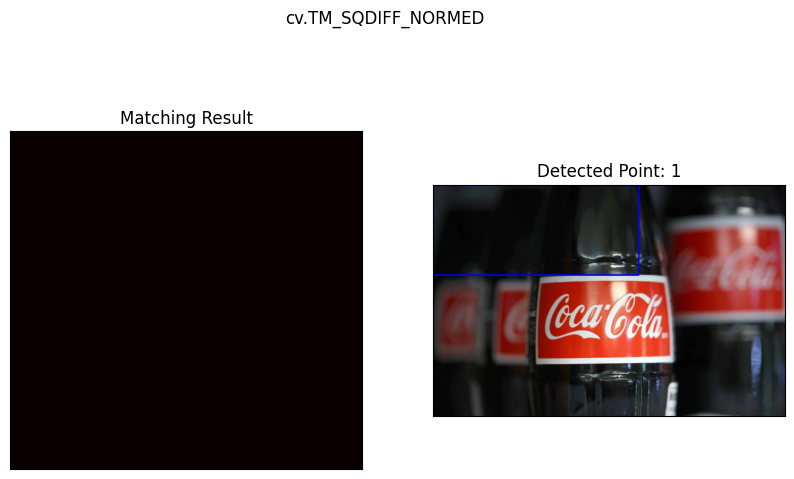

./TP3/images/coca_retro_2.png


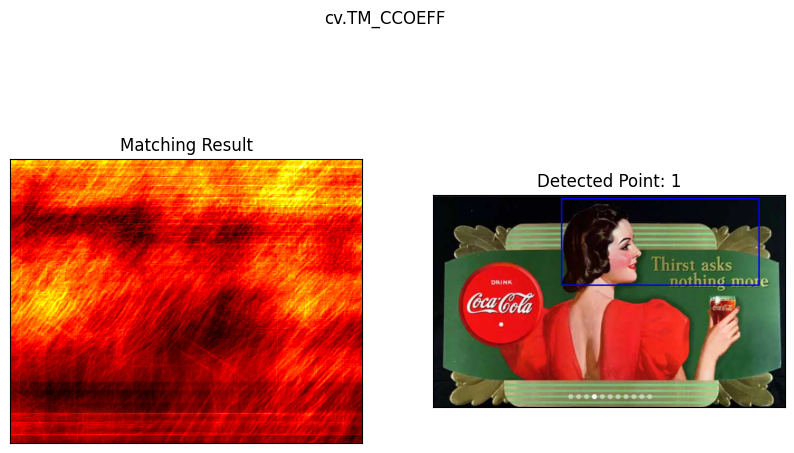

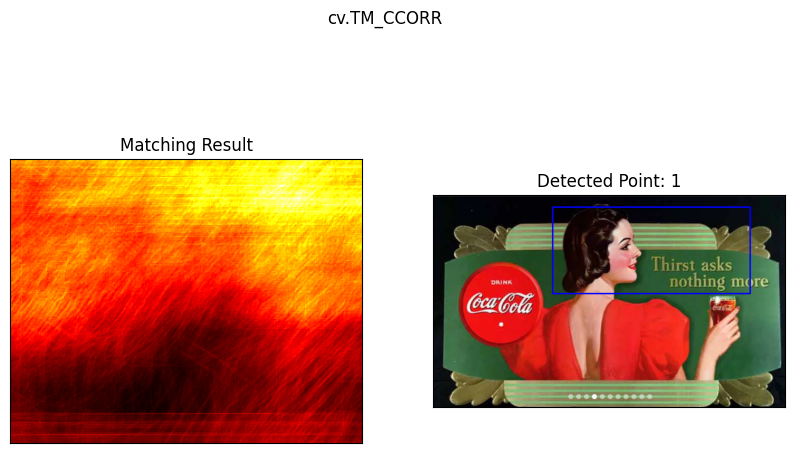

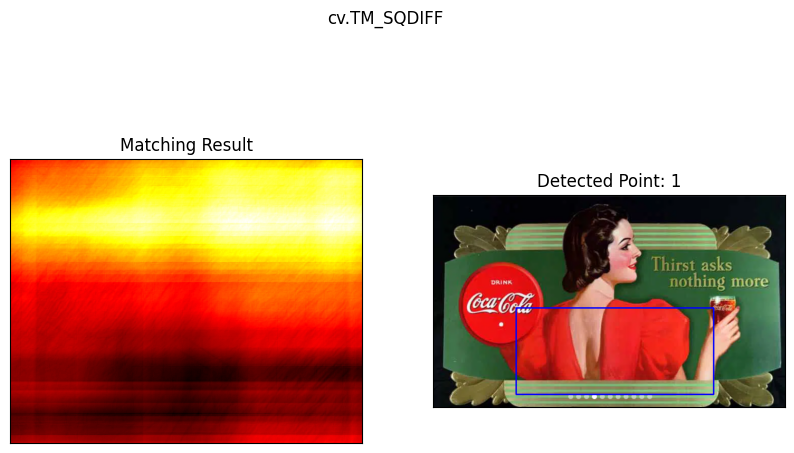

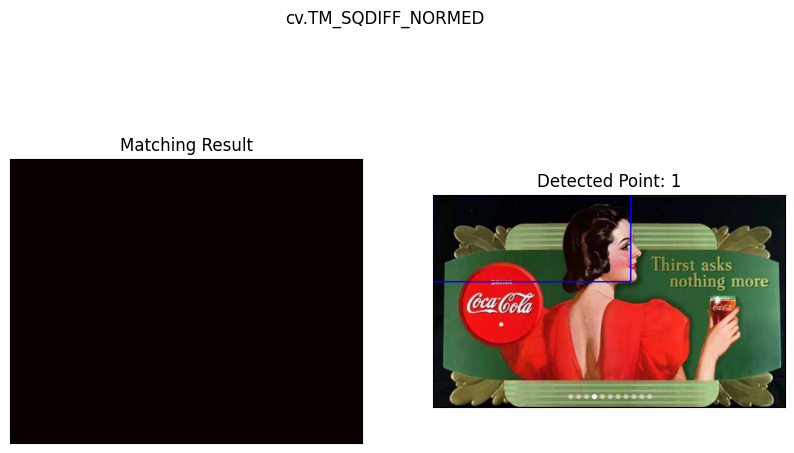

./TP3/images/coca_retro_1.png


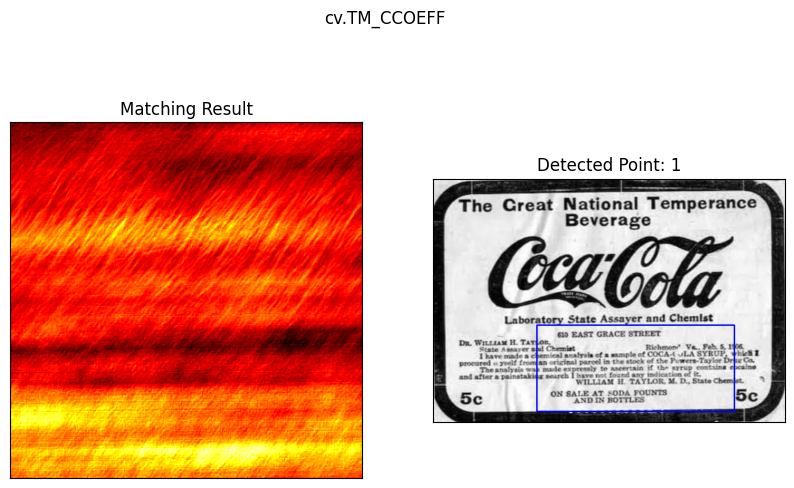

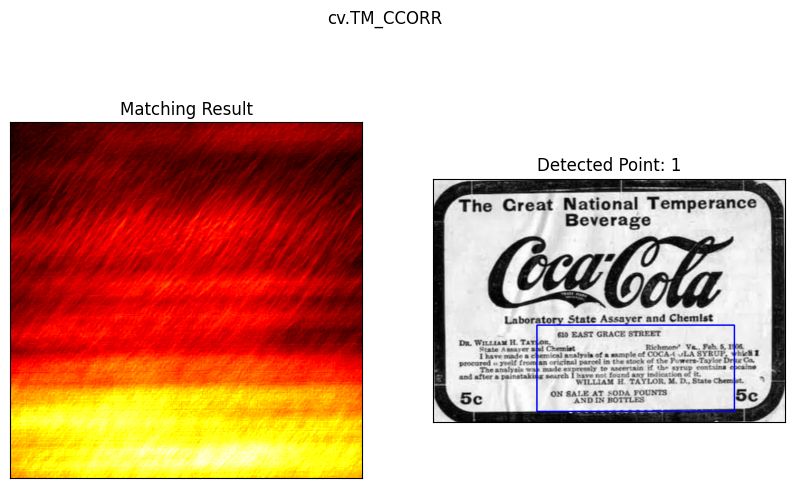

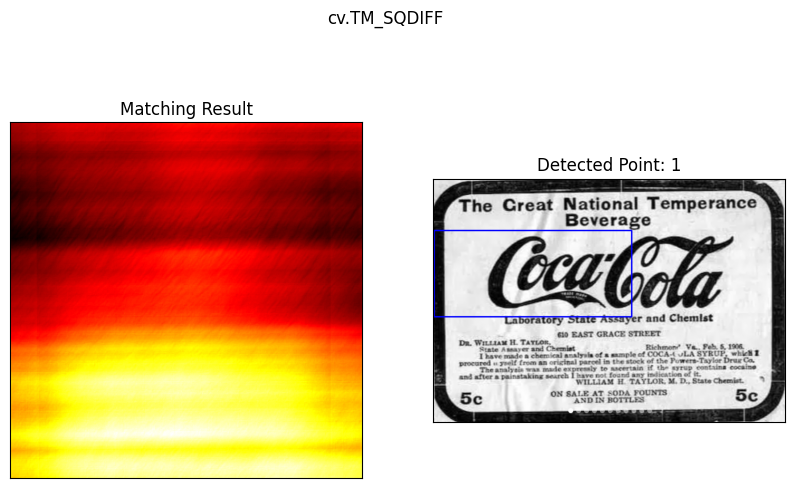

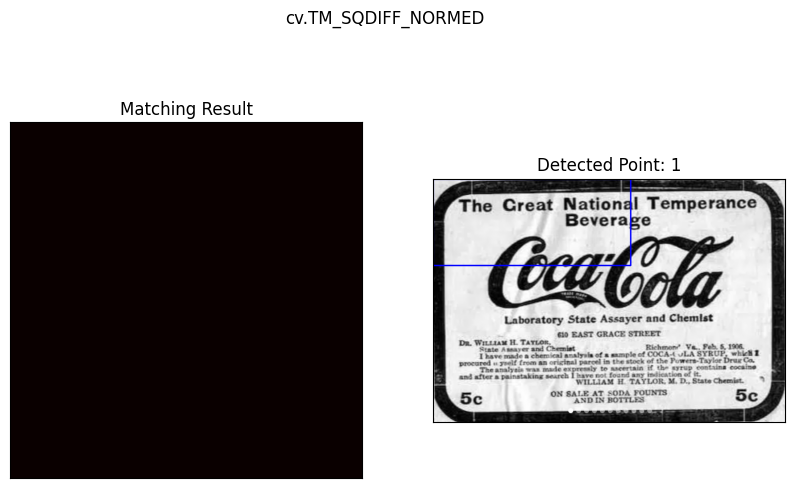

./TP3/images/coca_multi.png


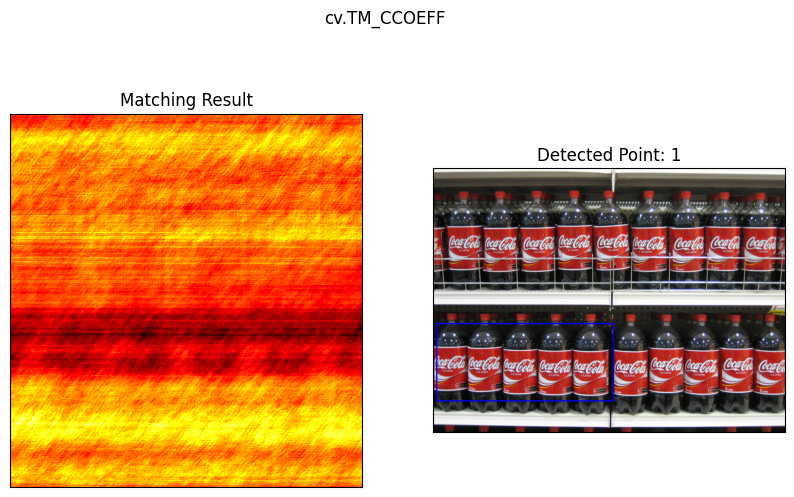

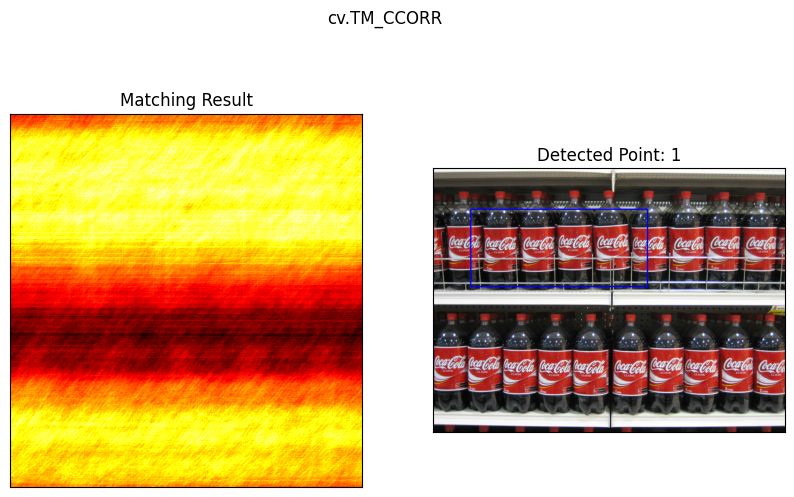

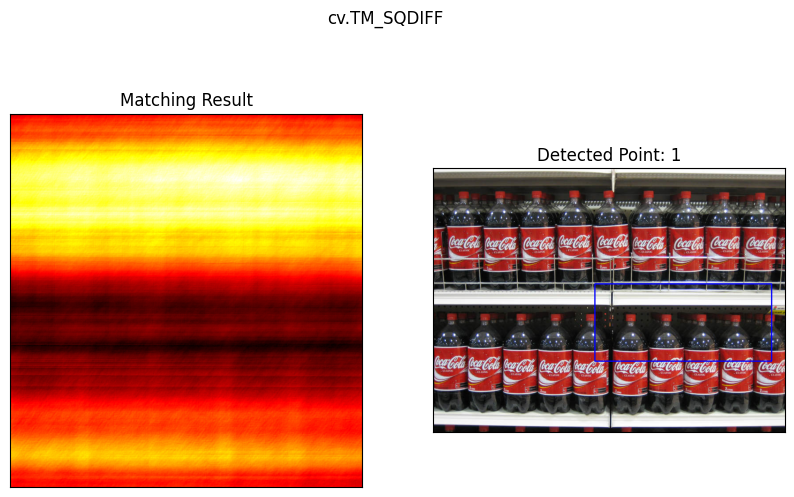

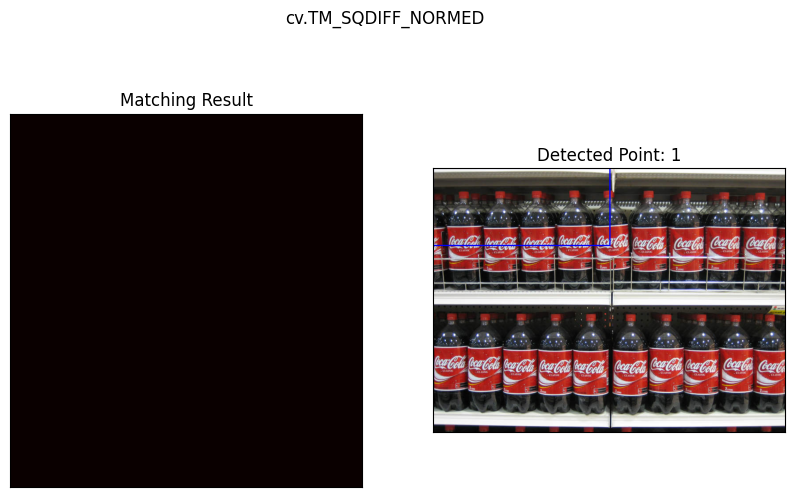

./TP3/images/coca_logo_2.png


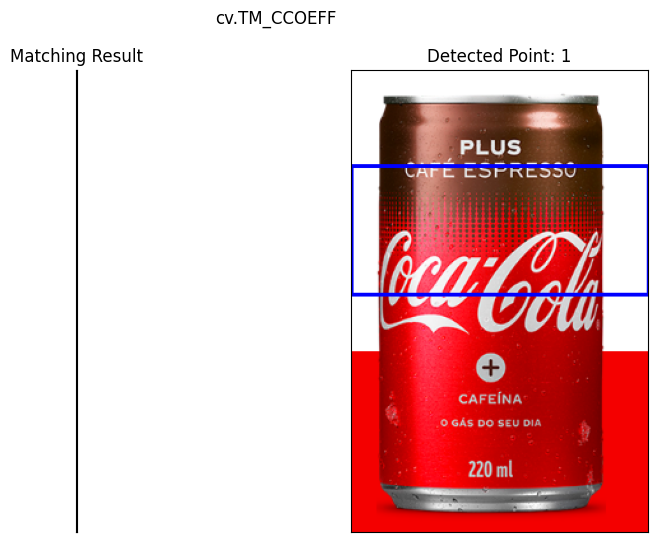

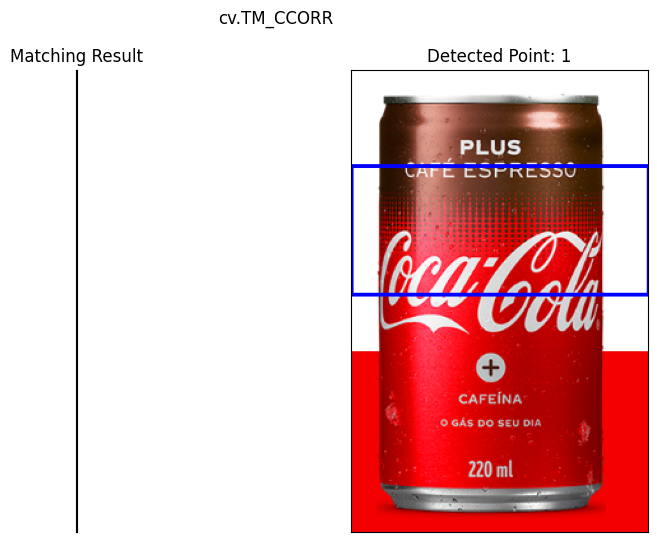

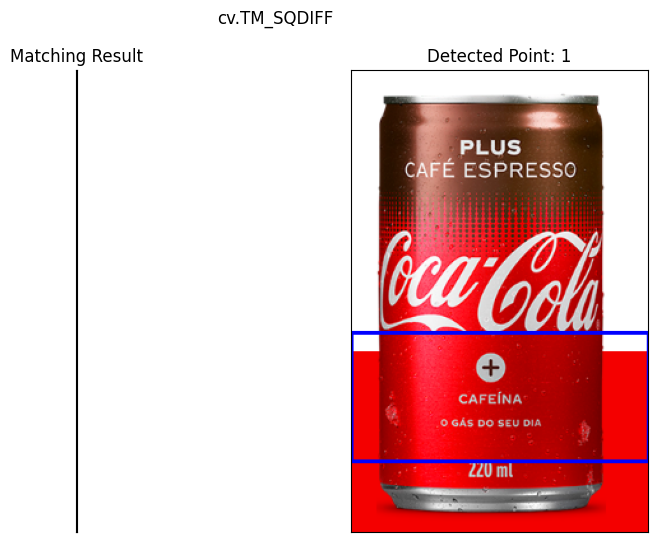

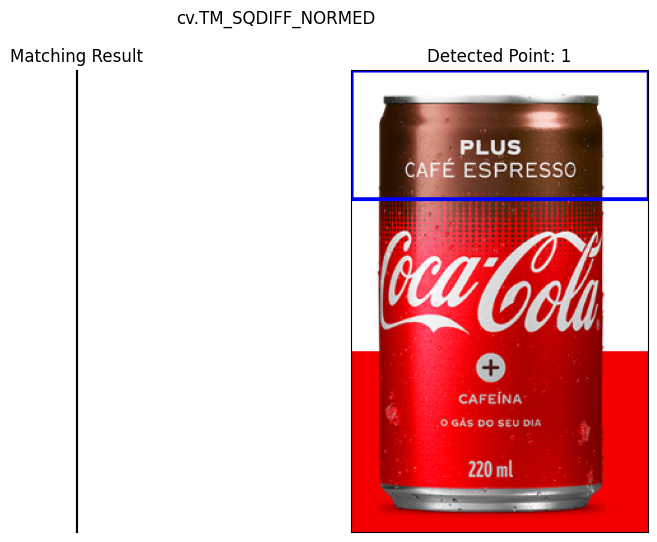

./TP3/images/coca_logo_1.png


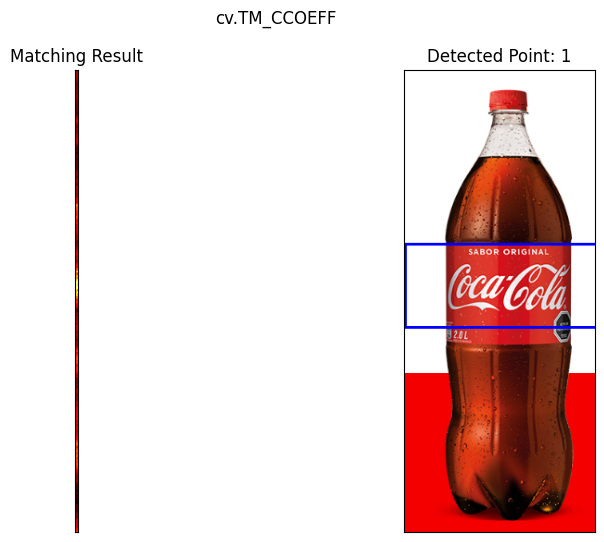

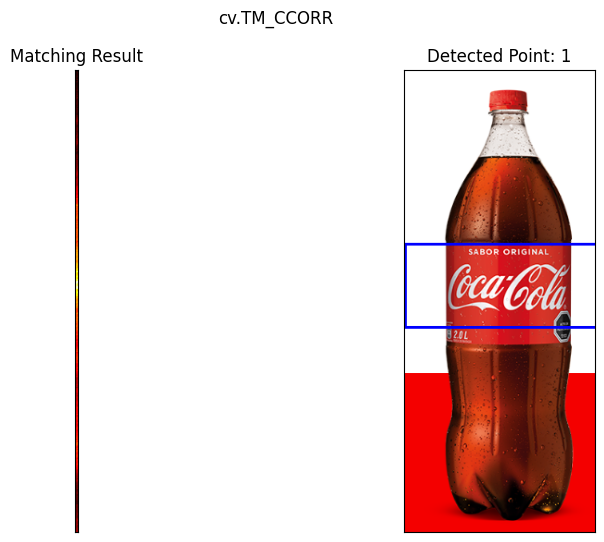

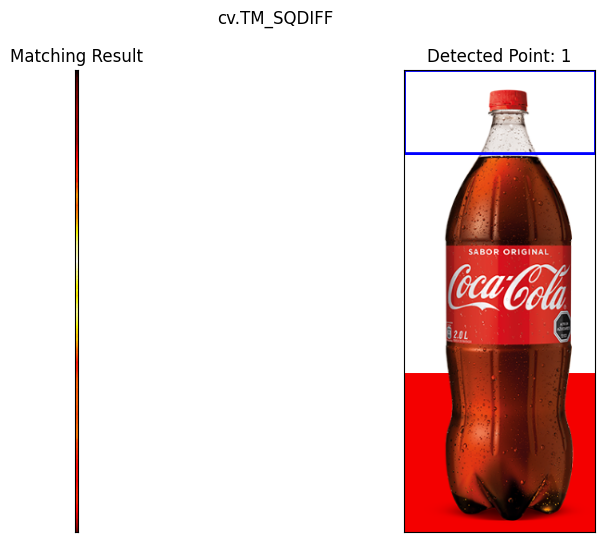

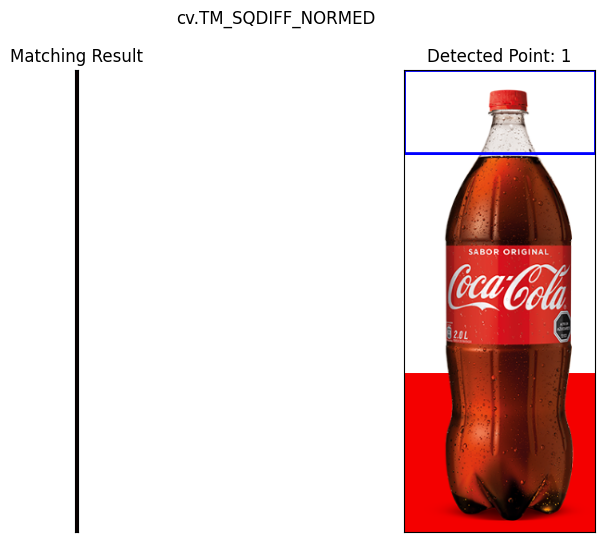

./TP3/images/COCA-COLA-LOGO.jpg


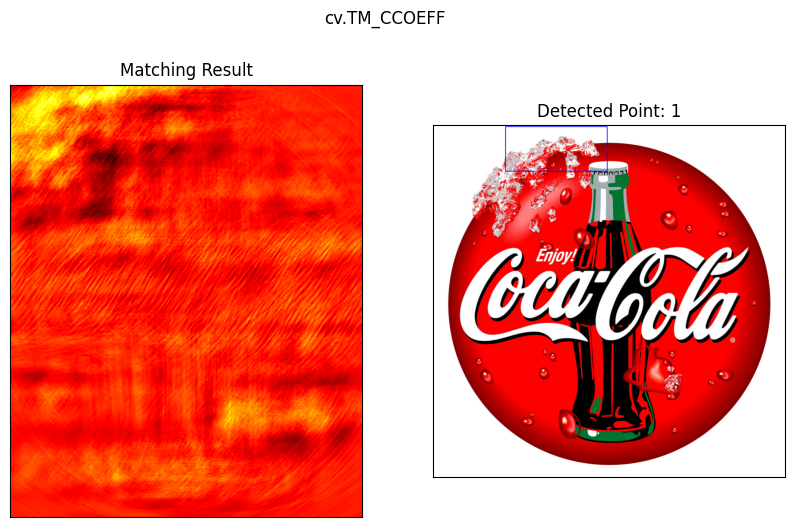

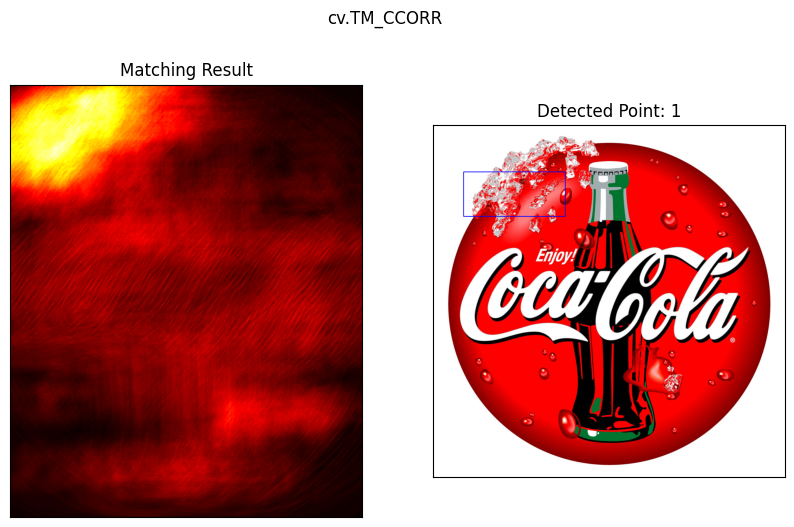

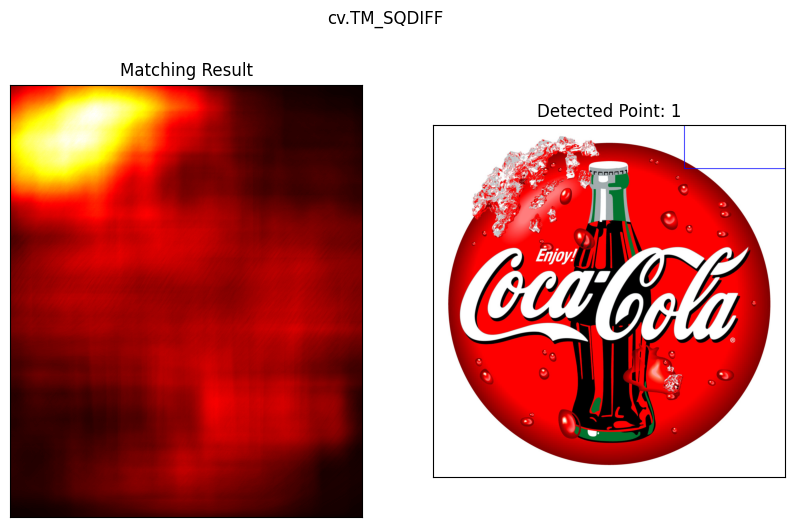

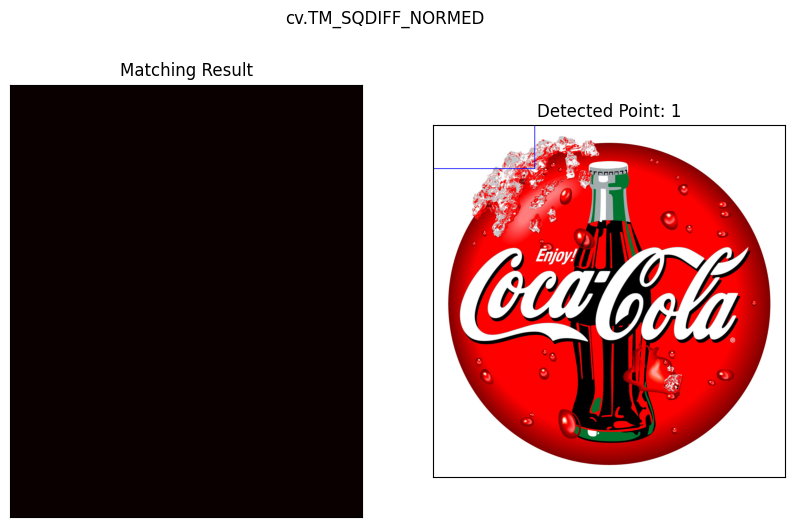

In [48]:
w, h = template.shape[::-1]

# Los 6 métodos posibles para comparación:
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
    'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']


for image_path in image_paths:
    print(image_path)
    img = cv.imread(image_path)
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    edges = cv.Canny(img_gray, 50, 150)

    resized_template = resize_template_if_needed(edges, template)
    template_h, template_w = resized_template.shape[:2]

    
    for meth in methods:
        img_copy = img.copy()
        method = eval(meth)
        res = cv.matchTemplate(edges, resized_template, method)
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
        
        if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
            top_left = min_loc
            match_val = min_val
        else:
            top_left = max_loc
            match_val = max_val

        threshold = 1.5
        if match_val < threshold:
            continue

        # Calculate bottom-right corner
        bottom_right = (top_left[0] + template_w, top_left[1] + template_h)

        # Collect detections for NMS
        detections = [[top_left[0], top_left[1], bottom_right[0], bottom_right[1]]]
        scores = [match_val]

        final_detections = apply_nms(detections, scores, iou_threshold=0.5)

        for x1, y1, x2, y2 in final_detections:
            cv.rectangle(img_copy, (x1, y1), (x2, y2), (255, 0, 0), 2)
        # Validate coordinates
        #top_left = (max(0, top_left[0]), max(0, top_left[1]))
        #bottom_right = (min(top_left[0] + template_w, img.shape[1]), 
        #                min(top_left[1] + template_h, img.shape[0]))
        
        # Draw rectangle
        #if top_left[0] < bottom_right[0] and top_left[1] < bottom_right[1]:
        #    cv.rectangle(img_copy, top_left, bottom_right, (255, 0, 0), 2)
        

        # Display results
        plt.figure(figsize=(10, 6))
        
        # Matching result
        plt.subplot(121)
        plt.imshow(res, cmap='hot')
        plt.title('Matching Result')
        plt.xticks([])
        plt.yticks([])

        # Original image with detections
        plt.subplot(122)
        plt.imshow(cv.cvtColor(img_copy, cv.COLOR_BGR2RGB))
        plt.title(f'Detected Point: {len(final_detections)}')
        plt.xticks([])
        plt.yticks([])

        plt.suptitle(meth)
        plt.show()





